In [84]:
#Adding the needed libraries.
 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn import tree
from sklearn import metrics, model_selection, preprocessing


In [85]:
#Loading of the dataset
data = pd.read_csv("C:/Users/Yeshu/OneDrive/Desktop/Documents/AllFourSeasons.csv")


In [86]:
data.shape

(126, 25)

In [87]:
data.drop("Team", axis=1, inplace=True)
data.drop("G", axis=1, inplace=True)
#data.drop("Rk", axis=1, inplace=True)

In [88]:
data

,Rk,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1.0,241.2,43.4,91.1,0.476,13.5,38.2,0.353,29.9,52.9,...,0.773,9.3,40.4,49.7,26.0,7.5,5.9,13.9,19.6,118.1
1,2.0,241.5,44.0,89.8,0.491,13.3,34.4,0.385,30.8,55.3,...,0.801,9.7,36.5,46.2,29.4,7.6,6.4,14.3,21.4,117.7
2,3.0,240.9,43.7,92.2,0.473,10.3,29.9,0.344,33.4,62.4,...,0.761,11.1,36.2,47.3,27.0,7.4,5.4,14.8,21.1,115.4
3,4.0,241.5,41.5,88.2,0.471,10.8,30.2,0.359,30.7,58.0,...,0.771,10.9,36.9,47.8,26.9,7.4,5.3,14.9,21.3,115.2
4,5.0,241.8,41.3,87.5,0.471,10.0,25.8,0.388,31.3,61.7,...,0.792,9.7,35.8,45.5,24.0,6.8,4.7,14.5,23.3,115.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121,26.0,241.2,37.7,86.2,0.437,13.2,36.9,0.357,24.5,49.3,...,0.744,11.5,34.6,46.1,21.9,7.0,4.9,13.3,20.4,106.5
122,27.0,240.6,38.5,87.1,0.442,12.7,36.8,0.346,25.8,50.3,...,0.760,10.4,32.5,42.9,22.9,8.0,4.5,14.5,21.1,106.2
123,28.0,241.2,38.2,88.6,0.431,11.3,34.6,0.326,26.9,54.0,...,0.782,11.0,32.0,43.0,23.5,7.7,4.8,14.2,21.9,104.8
124,29.0,241.2,38.3,88.3,0.434,12.2,36.9,0.331,26.1,51.4,...,0.787,9.1,35.2,44.3,23.7,6.8,4.5,14.5,19.7,104.2


In [89]:
#from sklearn.preprocessing import MinMaxScaler

#scaler = MinMaxScaler()
#print(scaler.fit(data))
#print(scaler.transform(data))
#data[['MP','FG','FGA','FG%','3P','3PA','3P%','2P','2PA','2P%','FT','FT%','ORB','DRB','TRB','AST','STL','BLK','TOV','PF','PTS']] = scaler.fit_transform(data[['MP','FG','FGA','FG%','3P','3PA','3P%','2P','2PA','2P%','FT','FT%','ORB','DRB','TRB','AST','STL','BLK','TOV','PF','PTS']])
#x = data.values #returns a numpy array
#min_max_scaler = preprocessing.MinMaxScaler()
#x_scaled = min_max_scaler.fit_transform(x)
#dataN = pd.DataFrame(x_scaled)
#dataN


In [90]:
data.isnull().values.any()
data.isnull().sum().sum()
data['MP'].isnull().values.any()
data['MP'].isnull().sum().sum()
data = data.dropna()
data


,Rk,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1.0,241.2,43.4,91.1,0.476,13.5,38.2,0.353,29.9,52.9,...,0.773,9.3,40.4,49.7,26.0,7.5,5.9,13.9,19.6,118.1
1,2.0,241.5,44.0,89.8,0.491,13.3,34.4,0.385,30.8,55.3,...,0.801,9.7,36.5,46.2,29.4,7.6,6.4,14.3,21.4,117.7
2,3.0,240.9,43.7,92.2,0.473,10.3,29.9,0.344,33.4,62.4,...,0.761,11.1,36.2,47.3,27.0,7.4,5.4,14.8,21.1,115.4
3,4.0,241.5,41.5,88.2,0.471,10.8,30.2,0.359,30.7,58.0,...,0.771,10.9,36.9,47.8,26.9,7.4,5.3,14.9,21.3,115.2
4,5.0,241.8,41.3,87.5,0.471,10.0,25.8,0.388,31.3,61.7,...,0.792,9.7,35.8,45.5,24.0,6.8,4.7,14.5,23.3,115.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121,26.0,241.2,37.7,86.2,0.437,13.2,36.9,0.357,24.5,49.3,...,0.744,11.5,34.6,46.1,21.9,7.0,4.9,13.3,20.4,106.5
122,27.0,240.6,38.5,87.1,0.442,12.7,36.8,0.346,25.8,50.3,...,0.760,10.4,32.5,42.9,22.9,8.0,4.5,14.5,21.1,106.2
123,28.0,241.2,38.2,88.6,0.431,11.3,34.6,0.326,26.9,54.0,...,0.782,11.0,32.0,43.0,23.5,7.7,4.8,14.2,21.9,104.8
124,29.0,241.2,38.3,88.3,0.434,12.2,36.9,0.331,26.1,51.4,...,0.787,9.1,35.2,44.3,23.7,6.8,4.5,14.5,19.7,104.2


In [91]:
data.isnull().values.any()

False

In [92]:
x = data.drop(['PTS'], axis = 1).values
y = data['PTS'].values

In [93]:
print(x)

[[  1.  241.2  43.4 ...   5.9  13.9  19.6]
 [  2.  241.5  44.  ...   6.4  14.3  21.4]
 [  3.  240.9  43.7 ...   5.4  14.8  21.1]
 ...
 [ 28.  241.2  38.2 ...   4.8  14.2  21.9]
 [ 29.  241.2  38.3 ...   4.5  14.5  19.7]
 [ 30.  241.5  38.3 ...   4.6  14.   18.3]]


In [94]:
print(y)

[118.1 117.7 115.4 115.2 115.1 114.7 114.5 114.4 114.2 114.  113.9 113.3
 112.5 112.4 112.2 111.8 111.7 111.7 110.7 110.7 108.9 108.  107.5 107.3
 107.  105.7 104.9 104.6 104.5 103.5 118.7 117.8 117.  116.3 115.8 115.
 114.4 114.1 113.7 113.6 113.4 113.3 112.8 112.6 112.  111.8 111.8 111.3
 111.3 110.7 110.4 110.1 109.4 107.3 107.2 106.9 106.8 106.3 105.8 102.9
 120.1 118.6 116.6 116.4 116.1 115.3 115.3 115.1 114.6 114.  113.7 113.7
 113.7 113.6 113.3 112.6 112.4 112.1 111.3 111.1 110.7 109.5 109.5 108.8
 108.1 107.  106.6 105.  104.  103.8 115.9 115.6 115.5 115.3 114.8 113.9
 113.6 113.2 112.9 112.7 112.1 111.8 111.6 111.5 111.  110.3 110.  109.9
 109.7 109.4 109.3 108.6 108.4 108.  107.8 106.5 106.2 104.8 104.2 103.7]


In [95]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [96]:
from sklearn.linear_model import LinearRegression
ml=LinearRegression()
ml.fit(x_train, y_train)

LinearRegression()

In [97]:
y_pred = ml.predict(x_test)
print(y_pred)

[112.01922728 111.24340449 115.16088152 106.85002736 104.89156576
 115.99371561 113.71280872 113.79155519 113.41549176 109.95012007
 110.63477494 116.5651919  113.37158156 114.36402564 103.89613823
 115.71093411 109.43462152 118.17368611 104.14311867 110.92097493
 115.26391393 111.68076679 117.77270452 113.7071826  112.65060771
 112.47160736 111.70333711 107.82448305 112.38476279 113.23980464
 106.95607281 111.20354117 107.28027025 113.70288153 106.81606415
 109.28843239]


In [98]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.9995071657697715

Text(0.5, 1.0, 'Actual vs Predicted')

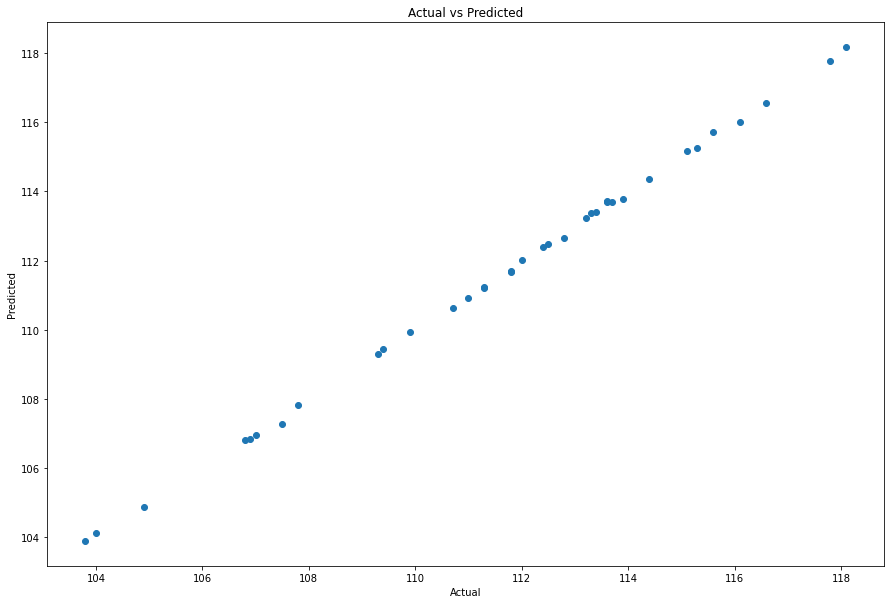

In [99]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
plt.scatter(y_test, y_pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted")

In [100]:
pred_y_data = pd.DataFrame({'Actual Value':y_test, 'Predicted Value':y_pred, 'Difference': y_test-y_pred})
pred_y_data[0:20]

,Actual Value,Predicted Value,Difference
0,112.0,112.019227,-0.019227
1,111.3,111.243404,0.056596
2,115.1,115.160882,-0.060882
3,106.9,106.850027,0.049973
4,104.9,104.891566,0.008434
5,116.1,115.993716,0.106284
6,113.6,113.712809,-0.112809
7,113.9,113.791555,0.108445
8,113.4,113.415492,-0.015492
9,109.9,109.950120,-0.050120
